In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets

# Mnist: classification de chiffres manuscrits

Dans ce TD, nous allons tenter de reconnaître des chiffres manuscrits avec différents algorithmes de machine learning, à l'aide de la librairie python sklearn.

## Téléchargement des données

In [2]:
dataset_train = datasets.MNIST("../data", train=True)
X_train_base, y_train_base = dataset_train.data.numpy(), dataset_train.targets.numpy()

dataset_test = datasets.MNIST("../data", train=False)
X_test_base, y_test_base = dataset_test.data.numpy(), dataset_test.targets.numpy()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:07<00:00, 1291813.69it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 23407863.54it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 955666.18it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4948189.29it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



## Aperçu des données

In [3]:
print("nombre d'image en entrée ", X_train_base.shape, X_test_base.shape)
print("taille sortie", y_train_base.shape, y_test_base.shape)
print(y_train_base[0:10], "les sorties des 10 premieres images")

nombre d'image en entrée  (60000, 28, 28) (10000, 28, 28)
taille sortie (60000,) (10000,)
[5 0 4 1 9 2 1 3 1 4] les sorties des 10 premieres images


Et pour la première image :

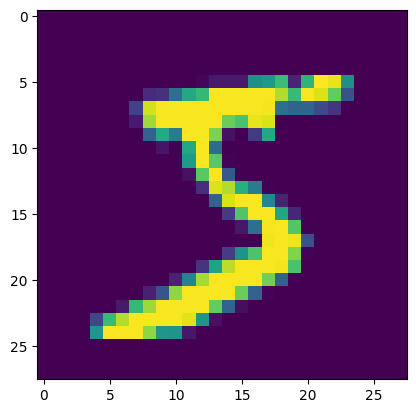

In [4]:
plt.imshow(X_train_base[0])

## Visualisation des données

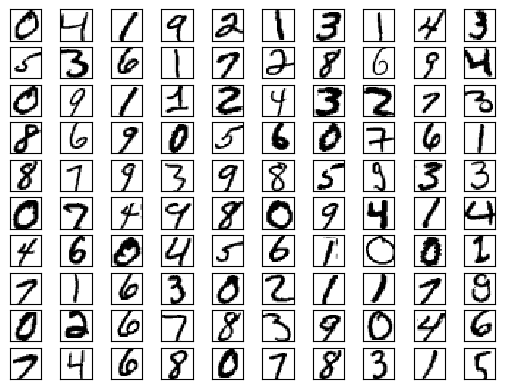

In [5]:
def plot_10_by_10_images(images):
    """Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    # image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10 * y + x + 1)
            ax.matshow(images[10 * y + x + 1], cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()


plot_10_by_10_images(X_train_base)

## Aplatir les images
Les modèles de ML classiques ne prennet pas en compte l'aspect spatial des données. Il est nécessaire d'envoyer l'image sous forme de vecteur pour qu'elle soit reconnue à  l'entrée du modèle 

In [6]:
subset = 10000  # size
nb_classes = 10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = y_train_base[:subset]
y_test = y_test_base

In [7]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(10000, 784)


## Création d'un modèle linéaire

In [8]:
from sklearn.linear_model import LogisticRegression

# A COMPLETER

# Créer un modèle de régression logistique
model = None

# Entraîner le modèle

In [ ]:
# A COMPLETER

# Prédire les chiffres correspondant aux images de X_test

predictions = None
predictions

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, y_test)
print(accuracy)

Notre baseline est de 92% de taux de bonnes predictions. 

## Test du modèle  Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=7, verbose=1, max_features=10)

# A COMPLETER

# Entraîner le modèle

# Prédire les chiffres correspondant aux images de X_test
predictions = None

# Calculer l'accuracy
accuracy = None
print(accuracy)

### Exercise
Recommencer cette classification en modifiant les hyperparamètres du modèle. Observer l'influence des hyperparalmètres  ``max_depth``, ``max_features``, et ``n_estimators`` sur vos résultats.


Il est au moins possible d'arriver à 97% en changeant juste les valeurs de n_estimators et max_features.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Test du Support Vector Machine(svm)


In [ ]:
from sklearn import svm

model = svm.SVC(C=1.0, kernel="rbf", degree=3)

# A COMPLETER

# Entraîner le modèle

# Prédire les chiffres correspondant aux images de X_test
predictions = None

# Calculer l'accuracy
accuracy = None
print(accuracy)

- A faire : modifier les hyperparamètres de svm.SVC pour améliorer le score. Observer l'influence des hyperparalmètres  ``C``, ``kernel``, et ``gamma`` sur vos résultats.

Il est au moins possible d'arriver à 95%.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


## Conclusion
- bonnes predictions pour les modèles de ML classiques
- scores toujours en dessous d'un être humain
- score qui continuera à descendre plus on augmente la taille des images

## Bonus
- visualiser les échantillons où le modèle s'est trompé de beaucoup